In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers,Model,models
import pandas as pd
print(tf.__version__)

2.4.1


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-01-30 12:02:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   111MB/s    in 0.6s    

2021-01-30 12:02:06 (111 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
 
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.960.jpg', 'cat.475.jpg', 'cat.33.jpg', 'cat.273.jpg', 'cat.520.jpg', 'cat.666.jpg', 'cat.307.jpg', 'cat.876.jpg', 'cat.864.jpg', 'cat.511.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [ ]:
print("total training dogs images:",len(os.listdir(train_dogs_dir)))
print("total training cats images:",len(os.listdir(train_cats_dir)))
print("total validation dogs images:",len(os.listdir(validation_dogs_dir)))
print("total validation cats images:",len(os.listdir(validation_cats_dir)))

total training dogs images: 1000
total training cats images: 1000
total validation dogs images: 500
total validation cats images: 500


In [ ]:
import matplotlib.pyplot as plt
import random as ra
#r=int(ra.random()*1000)
pat=[]
print(pat)
for i in range(1000):
  pat.append(os.path.join(train_dogs_dir,train_dog_fnames[i]))

print(pat[5])

[]
/tmp/cats_and_dogs_filtered/train/dogs/dog.102.jpg


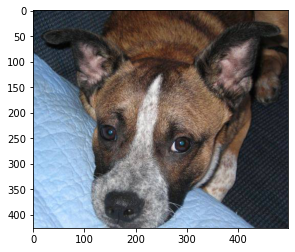

In [ ]:
img=plt.imread(pat[64])
plt.imshow(img)

nninput=layers.Input(shape=[150,150,3])
 
x=layers.Conv2D(32,3,activation='relu')(nninput)
x=layers.BatchNormalization()(x) 
x=layers.MaxPooling2D(2)(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(64,3,activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.MaxPooling2D(2)(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(128,3,activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.MaxPooling2D(2)(x)
x=layers.BatchNormalization()(x)

x=layers.Flatten()(x)
x=layers.BatchNormalization()(x)
x=layers.Dense(512,activation='relu')(x)
x=layers.BatchNormalization()(x)

output=layers.Dense(1,activation='sigmoid')(x)
model=Model(nninput,output)

In [ ]:
 
nninput=layers.Input(shape=[150,150,3])
 
x=layers.Conv2D(32,3,activation='relu')(nninput) 
x=layers.MaxPooling2D(2)(x)
 
x=layers.Conv2D(64,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
 
x=layers.Conv2D(128,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
 
x=layers.Conv2D(256,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)

x=layers.Flatten()(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(512,activation='relu')(x)
x=layers.Dense(512,activation='relu')(x)

output=layers.Dense(1,activation='sigmoid')(x) 
model=Model(nninput,output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
 
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
 
train_datagen=ImageDataGenerator(
                   rescale=1./255,
                   rotation_range=20,
                   width_shift_range=0.1,
                   height_shift_range=0.1,
                   shear_range=0.1,
                   zoom_range=0.1,
                   horizontal_flip=True)
 
 
val_datagen=ImageDataGenerator(rescale=1./255)
 
train_generator=train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary')
 
val_generator=val_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#train_generator[1]

In [ ]:
history=model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    validation_data=val_generator,
                    epochs=50,
                    validation_steps=50,
                    verbose=2,)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 - 19s - loss: 0.8035 - acc: 0.5050 - val_loss: 0.6926 - val_acc: 0.5030
Epoch 2/50
100/100 - 16s - loss: 0.7010 - acc: 0.5075 - val_loss: 0.6882 - val_acc: 0.5170
Epoch 3/50
100/100 - 16s - loss: 0.6954 - acc: 0.5340 - val_loss: 0.6850 - val_acc: 0.5710
Epoch 4/50
100/100 - 16s - loss: 0.6851 - acc: 0.5790 - val_loss: 0.6594 - val_acc: 0.5900
Epoch 5/50
100/100 - 16s - loss: 0.6715 - acc: 0.6190 - val_loss: 0.6146 - val_acc: 0.6670
Epoch 6/50
100/100 - 16s - loss: 0.6514 - acc: 0.6470 - val_loss: 0.5942 - val_acc: 0.6880
Epoch 7/50
100/100 - 16s - loss: 0.6350 - acc: 0.6505 - val_loss: 0.5942 - val_acc: 0.6990
Epoch 8/50
100/100 - 16s - loss: 0.6159 - acc: 0.6670 - val_loss: 0.5936 - val_acc: 0.6820
Epoch 9/50
100/100 - 16s - loss: 0.5771 - acc: 0.7000 - val_loss: 0.5461 - val_acc: 0.7250
Epoch 10/50
100/100 - 16s - loss: 0.5919 - acc: 0.7055 - val_loss: 0.5873 - val_acc: 0.6640
Epoch 11/50
100/100 - 16s - loss: 0.5722 - acc: 0.6985 - val_loss: 0.5334 - val_acc: 0.72

Text(0.5, 1.0, 'Training and validation loss')

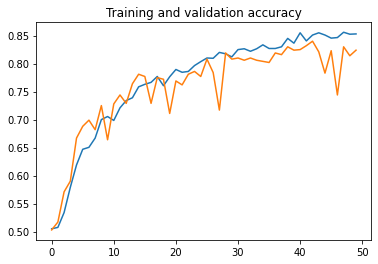

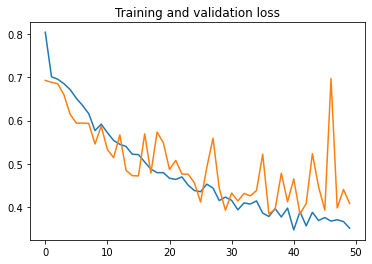

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
 
# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
 
# Get number of epochs
epochs = range(len(acc))
 
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
 
plt.figure()
 
# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


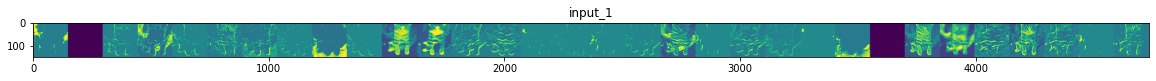

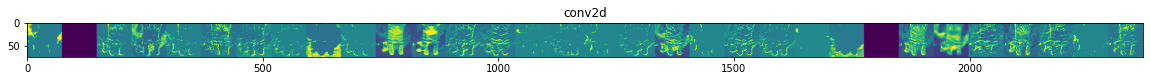

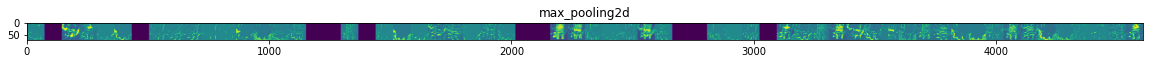

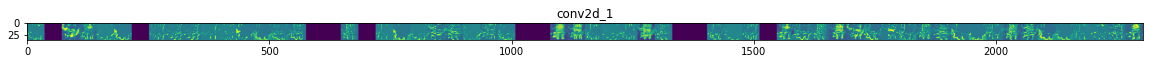

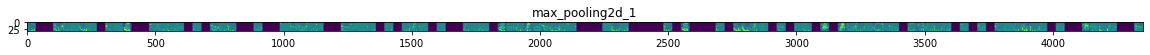

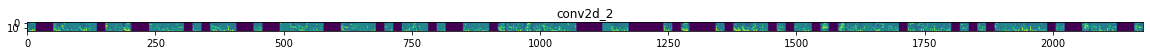

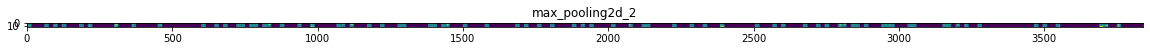

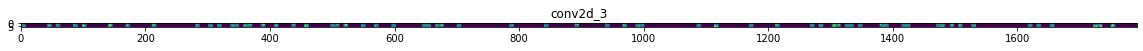

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(nninput, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
#model.save('imgmodel.h5')

In [ ]:
import requests

print('Beginning file download with requests')

url = 'https://github.com/AnujPanthri/cat_dog/blob/master/imgmodel.h5?raw=true'
r = requests.get(url)

with open('model.h5', 'wb') as f:
    f.write(r.content)

Beginning file download with requests


In [ ]:
mod=tf.keras.models.load_model('model.h5') 

In [ ]:
best=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/best_cat_dog.h5') 

In [ ]:
from PIL import Image
from numpy import array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
img=load_img('7.jpg',target_size=(150,150))
ar=array(img)
#plt.imshow(ar)
ar = ar.reshape(1, 150, 150, 3)
all=np.concatenate((ar,ar))
# center pixel data
all = all.astype('float32')
all = all/255
#print("asd",ar.shape)
#print("asd",ar)
Result=mod.predict(all)
# if(Result[0][0]==0):
#   print("Cat!")
# else:
#   print("dog!")
print("dog:",Result[0][0]*100)
print("cat:",(1-Result[0][0])*100)

dog: 8.024992048740387
cat: 91.97500795125961


In [ ]:
all

array([[[[0.69411767, 0.59607846, 0.5764706 ],
         [0.69411767, 0.6039216 , 0.5803922 ],
         [0.69803923, 0.6039216 , 0.5882353 ],
         ...,
         [0.827451  , 0.8117647 , 0.80784315],
         [0.7137255 , 0.73333335, 0.7176471 ],
         [0.61960787, 0.6392157 , 0.62352943]],

        [[0.69411767, 0.59607846, 0.5764706 ],
         [0.69411767, 0.6039216 , 0.5803922 ],
         [0.69803923, 0.6039216 , 0.5882353 ],
         ...,
         [0.78431374, 0.7529412 , 0.7411765 ],
         [0.6313726 , 0.6784314 , 0.6627451 ],
         [0.57254905, 0.60784316, 0.6039216 ]],

        [[0.69411767, 0.59607846, 0.5764706 ],
         [0.69411767, 0.6039216 , 0.5803922 ],
         [0.69803923, 0.6039216 , 0.5882353 ],
         ...,
         [0.7647059 , 0.73333335, 0.7254902 ],
         [0.54509807, 0.58431375, 0.5803922 ],
         [0.5019608 , 0.5411765 , 0.5372549 ]],

        ...,

        [[0.6862745 , 0.5882353 , 0.57254905],
         [0.68235296, 0.5882353 , 0.57254905]

In [ ]:
a=np.ndarray.flatten(Result)
print("dog:",all.shape)

dog: (2, 150, 150, 3)
